# Euler's Method Demo

In [24]:
# Standard imports
import numpy as np
from matplotlib.pyplot import plot, axis, figure, xlabel, ylabel, title, legend, cla
%matplotlib notebook

## Euler's Method

In [25]:
def MyEuler(f, tspan, y0, N=100):
    '''
    t,y = MyEuler(f, tspan, y0, N=100)
    
    Use Euler's method to approximate the solution of y' = f(t,y).
    
     Input
       f  is the handle to a Matlab dynamics function with calling sequence
            dydt = f(t, y)
       tspan is a 1x2 vector, [start end]
       y0 is the initial state of the system
       N is the number of steps to take

     Output
       t and y are column vectors of the same length.
    '''

    # Initialize output arrays
    t = np.linspace(tspan[0], tspan[1], N+1)
    h = t[1] - t[0]  # step size
    z = [y0]
    
    zz = y0
    for tt in t[:-1]:
        zz = zz + h * f(tt, zz)
        z.append(zz)

    return t, np.array(z)

## Try a simple ODE

In [26]:
def simple_de(t, z):
    return t-z

<IPython.core.display.Javascript object>


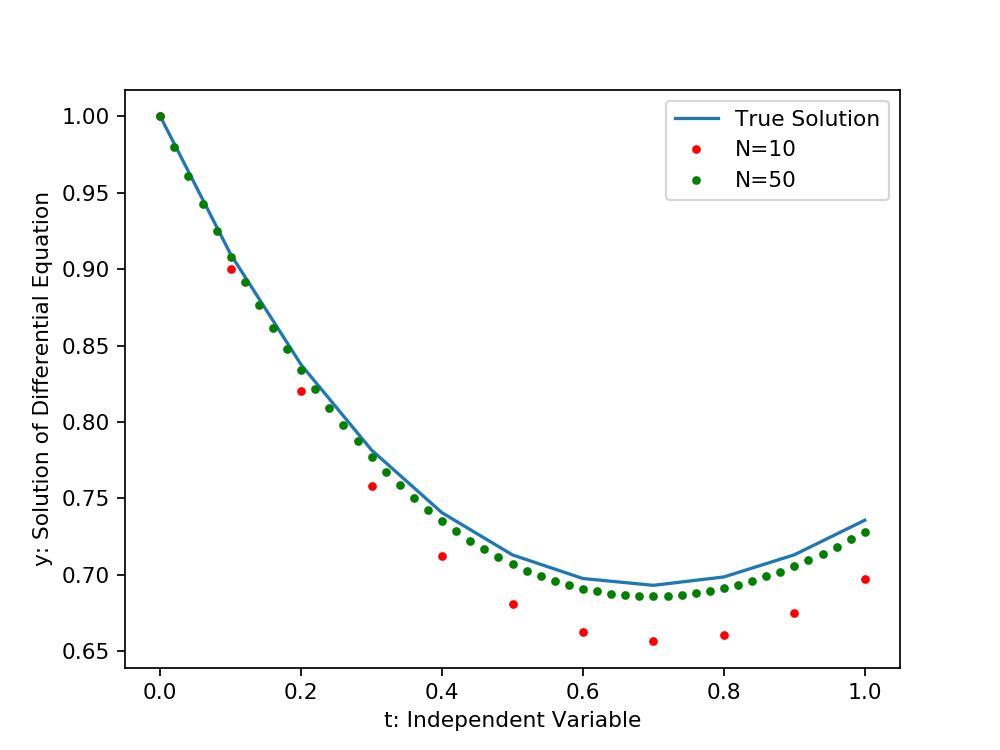

In [27]:
figure(1); cla();
N=10
t,y = MyEuler(simple_de, [0., 1], 1, N=N)
plot(t,2*np.exp(-t)+t-1)
plot(t,y,'r.')
xlabel('t: Independent Variable');ylabel('y: Solution of Differential Equation');

In [28]:
N = 50
t,y = MyEuler(simple_de, [0, 1], 1, N=50)
plot(t,y,'g.');
legend(['True Solution','N=10','N=50']);

## Golf Ball Trajectory

In [29]:
def simple_golf(t, z):
    # z[0] = x(t)
    # z[1] = y(t)
    # z[2] = y'(t)
    Vx = 30
    return np.array([Vx, z[2], -9.81])

<IPython.core.display.Javascript object>


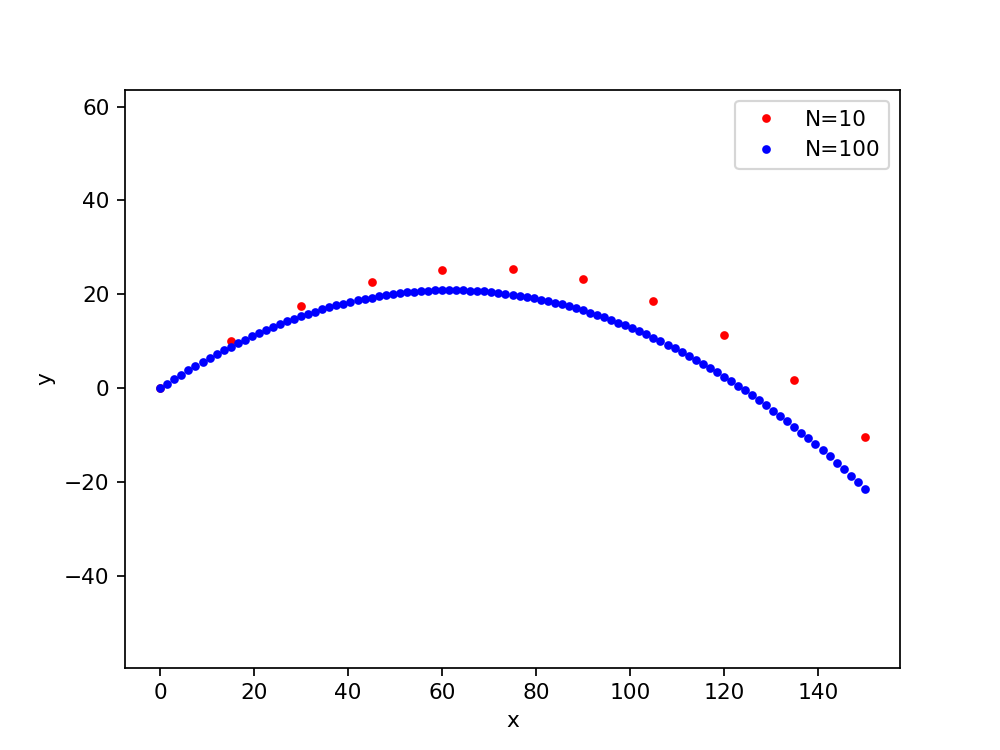

In [30]:
t,y = MyEuler(simple_golf, [0, 5], [0, 0, 20], N=10)
figure(2)
plot(y[:,0], y[:,1], 'r.')
xlabel('x'); ylabel('y'); axis('equal');

In [31]:
# Smaller time steps
t,y = MyEuler(simple_golf, [0, 5], [0, 0, 20], N=100)
plot(y[:,0], y[:,1], 'b.')
legend(['N=10', 'N=100']);